# Regression with Keras and GridSearchCV

- https://keras.io/examples/structured_data/imbalanced_classification/
- https://keras.io/examples/mnist_sklearn_wrapper/
- https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [1]:
import math

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from tensorflow import keras

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization

Using TensorFlow backend.


In [5]:
from keras.wrappers.scikit_learn import KerasRegressor

In [6]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import (
    GridSearchCV,
    train_test_split
)
from sklearn.metrics import mean_squared_error

In [7]:
X, y = load_diabetes(return_X_y=True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
X_train.shape

(353, 10)

In [10]:
train_rows, cols = X_train.shape

In [11]:
def make_model(input_dim, hidden_dim):    
    # Model
    model = Sequential([
        Dense(hidden_dim, activation='relu', input_dim=input_dim),
#         Dropout(0.10),
        Dense(hidden_dim, activation='relu'),
        Dense(1)
    ])
    
    # Metrics
    metrics = [
        keras.metrics.MeanSquaredError(name='mse'),
        keras.metrics.RootMeanSquaredError(name='rmse')
    ]
    
    # Optimiser
    optimizer = keras.optimizers.RMSprop(learning_rate=0.1)
    
    # Compile Model
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=metrics)
    
    return model

In [12]:
k_regressor_params = {"input_dim": cols, "epochs": 100, "batch_size": 16, 'verbose': False}
k_regressor = KerasRegressor(make_model, **k_regressor_params)

In [13]:
validator = GridSearchCV(k_regressor,
                         param_grid={
                             'hidden_dim': [8, 16, 32],
                             'batch_size': [16, 32],
                             'epochs': [200, 300]
                         },
                         scoring='neg_root_mean_squared_error',
                         verbose=1,
                         n_jobs=4,
                         cv=3)
validator.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 out of  36 | elapsed:   34.1s finished


GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x14b3f9dd0>,
             n_jobs=4,
             param_grid={'batch_size': [16, 32], 'epochs': [200, 300],
                         'hidden_dim': [8, 16, 32]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [14]:
print('The parameters of the best model are: ')
print(validator.best_params_)

# validator.best_estimator_ returns sklearn-wrapped version of best model.
# validator.best_estimator_.model returns the (unwrapped) keras model
best_model = validator.best_estimator_.model
metric_names = best_model.metrics_names
metric_values = best_model.evaluate(X_test, y_test)

for metric, value in zip(metric_names, metric_values):
    print(metric, ': ', value)

The parameters of the best model are: 
{'batch_size': 32, 'epochs': 200, 'hidden_dim': 8}
89/89 [==============================] - 0s 270us/step
loss :  2875.895359682233
mse :  3215.839599609375
rmse :  56.708370208740234


In [15]:
y_test_pred = validator.predict(X_test)

In [16]:
mse = mean_squared_error(y_test_pred, y_test)
rmse = math.sqrt(mse)

print('mse :  {}'.format(mse))
print('rmse :  {}'.format(rmse))

mse :  2875.8954369670096
rmse :  53.62737581652686


In [17]:
math.sqrt(sum((y_test_pred - y_test)**2) / len(y_test))

53.62737581652686

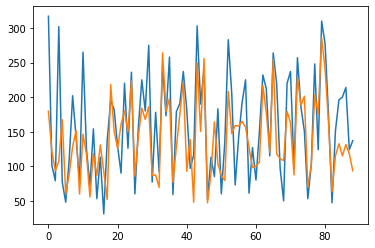

In [18]:
plt.plot(y_test)
plt.plot(y_test_pred)

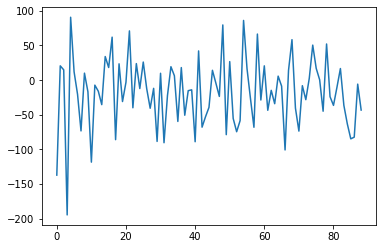

In [19]:
y_pred_delta = y_test_pred - y_test

plt.plot(y_pred_delta)

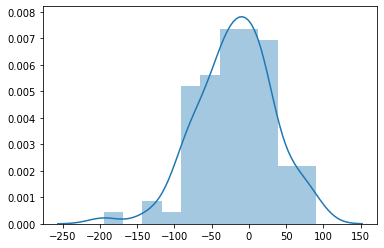

In [20]:
sns.distplot(y_pred_delta)

# Linear Model Comparison

In [21]:
from sklearn import linear_model

In [22]:
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))

In [23]:
reg.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))

In [24]:
y_test_pred = reg.predict(X_test)

In [25]:
# y_test_pred

In [26]:
mse = mean_squared_error(y_test_pred, y_test)
rmse = math.sqrt(mse)

print('mse :  {}'.format(mse))
print('rmse :  {}'.format(rmse))

mse :  2482.6698616634176
rmse :  49.8263972374425


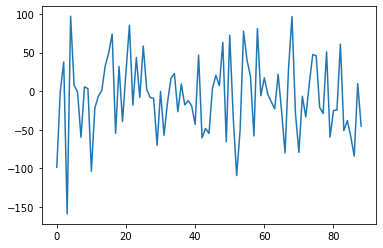

In [27]:
y_pred_delta = y_test_pred - y_test

plt.plot(y_pred_delta)

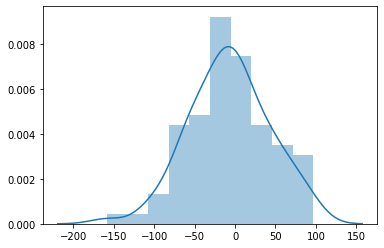

In [28]:
sns.distplot(y_pred_delta)